<a href="https://colab.research.google.com/github/ReynardGhazyTsaqif/DIF62130_B_25_2311532014/blob/main/Praktikum%205/Dimensi_Reduksi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data']
y = iris['target']

n_samples, n_features = X.shape

print(f'Number of samples: {n_samples}')
print(f'Number of features: {n_features}')

Number of samples: 150
Number of features: 4


Peratam muat dataset Iris, lalu gunakan load untuk memuat dataset Iris ke dalam variabel iris

X berisi data fitur

y berisi label target

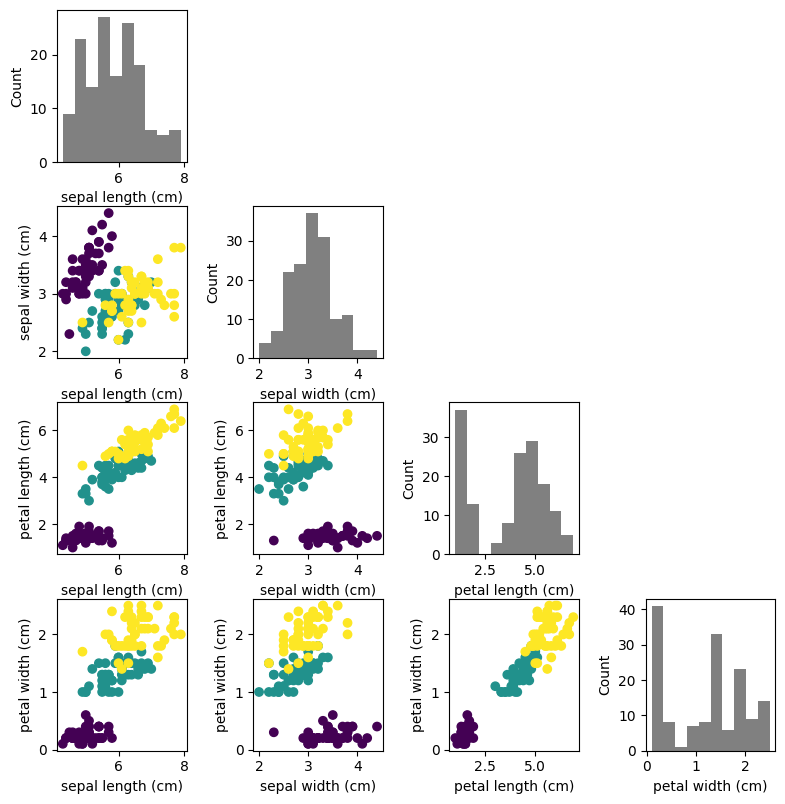

In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax= plt.subplots(nrows=n_features, ncols=n_features, figsize=(8, 8))
fig.tight_layout()

names = iris.feature_names

for i, j in zip(*np.triu_indices_from(ax, k=1)):
  ax[j, i].scatter(X[:, i], X[:, j], c=y)
  ax[j, i].set_xlabel(names[i])
  ax[j, i].set_ylabel(names[j])
  ax[i, j].set_axis_off()

for i in range(n_features):
  ax[i, i].hist(X[:, i], color = 'grey')
  ax[i, i].set_ylabel('Count')
  ax[i, i].set_xlabel(names[i])



numpy digunakan untuk operasi array, matplotlib.pyplot digunakan untuk membuat visualisasi grafik.

kemudian buat matriks subplot ukuran 4x4, dimana ax adalah array 2D yang merepresentasikan tiap subplot.

Kemudian buat Scatter Plot antar kombinasi fitur, np.triu_indices_from(ax, k=1) mengambil indeks segitiga atas, X[:, i] dan X[:, j] adalah pasangan fitur, c=y memberi warna berdasarkan label target.

Kemudian buat histogram diagonalnya. Di diagonal (plot i,i), ditampilkan histogram dari masing-masing fitur.


In [51]:
def mean(x):
  return sum(x)/len(x)

def std(x):
  return (sum((i - mean(x))**2 for i in x)/len(x))**0.5

def Standardize_data(x):
  return (x - mean(x))/std(x)

x_std = Standardize_data(X)



1. Standarisasi Data

Pertama, fungsi mean(x) menghitung nilai rata-rata dari array x dengan membagi jumlah semua elemen dengan panjang array tersebut. Selanjutnya, fungsi std(x) menghitung standar deviasi dengan menggunakan rumus akar dari rata-rata kuadrat selisih setiap elemen terhadap nilai rata-rata. Fungsi Standardize_data(x) kemudian mengubah data dengan rumus standar: (x - mean) / std, yang berarti setiap nilai dikurangi dengan rata-rata lalu dibagi dengan standar deviasinya.
Terakhir, x_std = Standardize_data(X) bertujuan untuk menstandarisasi dataset X.

In [52]:
print(X)
print(x_std)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

2. Covariance matrik



In [53]:
def covariance(x):
  return (x.T @ x)/(x.shape[0] - 1)

cov_mat = covariance(X_std)
cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

3. hitung eigenvector dan eigen value

In [54]:
from numpy.linalg import eig

eig_vals, eig_vecs = eig(cov_mat)

max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs = eig_vecs*signs[np.newaxis,:]
eig_vecs = eig_vecs.T



print('Eigenvalues:\n', eig_vals)
print('Eigenvectors:\n', eig_vecs)

Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors:
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


In [55]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i, :]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

print(eig_pairs)



[(np.float64(2.9380850501999918), array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])), (np.float64(0.920164904162487), array([0.37741762, 0.92329566, 0.02449161, 0.06694199])), (np.float64(0.14774182104494785), array([ 0.71956635, -0.24438178, -0.14212637, -0.63427274])), (np.float64(0.020853862176462023), array([-0.26128628,  0.12350962,  0.80144925, -0.52359713]))]


In [56]:
k = 2
W = eig_vecs_sorted[:k, :]
print (W.shape)

(2, 4)


Explained variance: [72.96 22.85  3.67  0.52]
Cumulative explained variance: [ 72.96  95.81  99.48 100.  ]


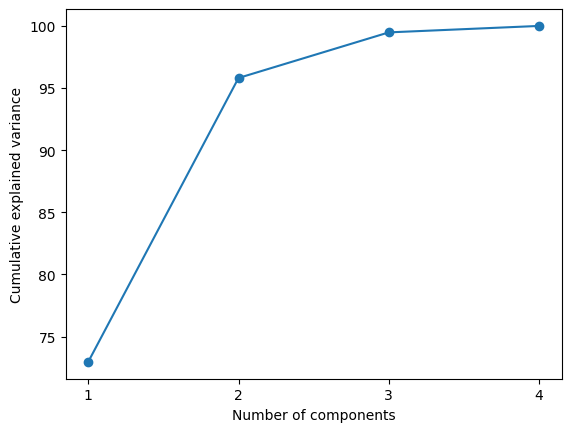

In [57]:
eig_vals_total = sum(eig_vals)
explained_variance = [(i/eig_vals_total)*100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

plt.plot(np.arange(1,n_features+1), cum_explained_variance, 'o-')
plt.xticks(np.arange(1,n_features+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

6. Proyeksi Data

In [58]:
X_proj = X_std.dot(W.T)

print(X_proj.shape)
print(X.shape)

(150, 2)
(150, 4)


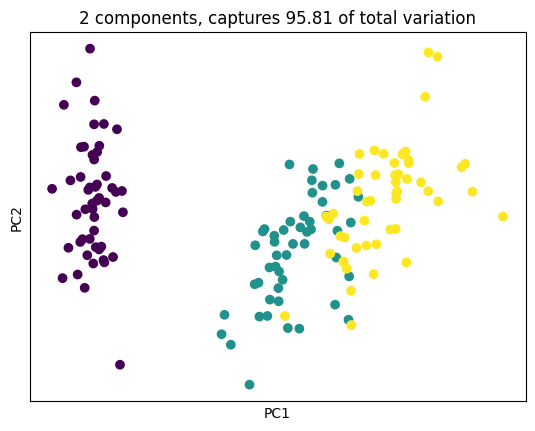

In [59]:
plt.scatter(X_proj[:,0], X_proj[:,1], c=y)
plt.xlabel('PC1')
plt.xticks([])
plt.ylabel('PC2')
plt.yticks([])
plt.title('2 components, captures {} of total variation'.format(cum_explained_variance[1]))
plt.show()

Tugas PCA dengan scikit learn